In [1]:
import sys,os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
import astropy.constants as const
import scipy
from matplotlib import gridspec
from astropy.io import fits
import pickle
from pickle import *
import time
import math
import re
from mpl_toolkits.axes_grid.inset_locator import inset_axes

/home/laura-pc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from ipykernel import kernelapp as app


In [2]:
Ns = 1000
Nt = 10

# Todos los casos son c2 a menos que se indique lo contrario

# Grid -- Galaxy 23

In [3]:
f = open('Results_Rad-RX/burn1-2-3_23grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

In [4]:
pos[0]

array([1.66799154e+00, 6.49867853e+00, 9.92119765e+00, 5.43351713e-01,
       3.60472919e+01, 8.63007691e-04, 4.32308155e+01, 7.56279471e+00,
       9.20308498e-03, 2.07798155e-01, 2.08720825e-01, 7.67362342e+00,
       5.69095659e+00, 6.70923437e+00, 4.89434625e+00])

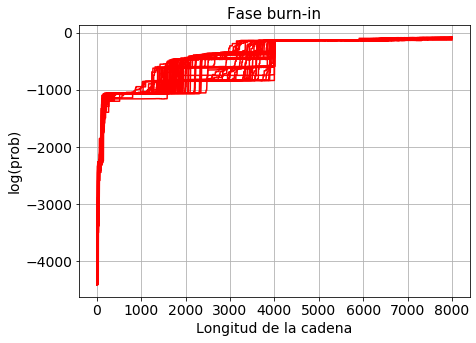

In [9]:
fig = plt.figure(figsize=(7, 5))
for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.title(r'Fase burn-in', fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.grid(True)
plt.ylabel(r'log(prob)', fontsize = 14) 
plt.xlabel(r'Longitud de la cadena', fontsize = 14) 
plt.show()

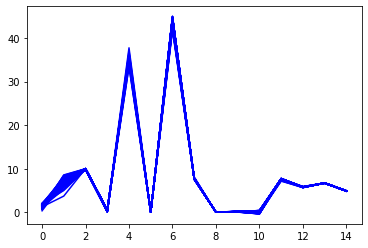

In [6]:
for i in range(100):
    plt.plot(pos[i], color = 'blue')

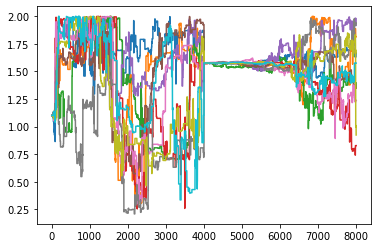

In [7]:
for i in range(10):
    plt.plot(samples['chain'][i,:, 0])

In [11]:
f = open('Results_Rad-RX/mcmc_23grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
print(lnprob.max())
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob_max)

-57.39399973134342
[-57.39399973]


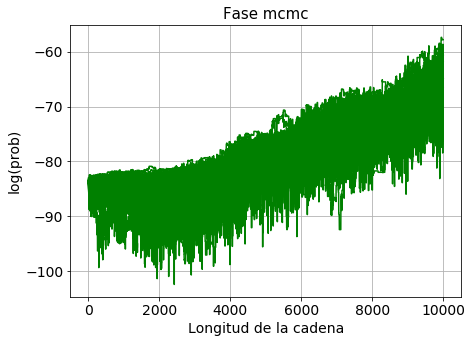

In [13]:
fig = plt.figure(figsize=(7, 5))
for i in range(100):
    plt.plot(lnprob[i], color = 'green')
plt.title(r'Fase mcmc', fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.grid(True)
plt.ylabel(r'log(prob)', fontsize = 14) 
plt.xlabel(r'Longitud de la cadena', fontsize = 14) 
plt.show()

# Free - Galaxy

In [15]:
f = open('Results_Rad-RX/burn1-2-3_23free.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

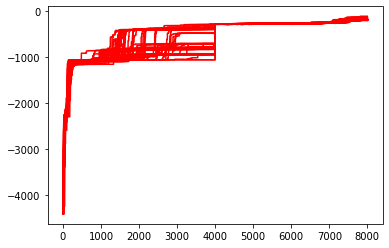

In [16]:
for i in range(100):
    plt.plot(lnprob[i], color = 'red')

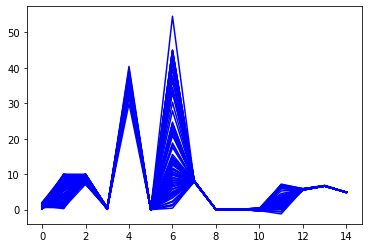

In [17]:
for i in range(100):
    plt.plot(pos[i], color = 'blue')

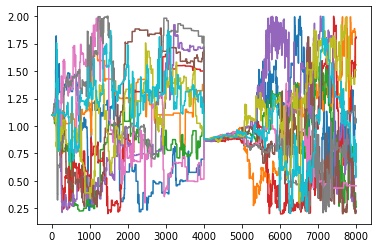

In [18]:
for i in range(10):
    plt.plot(samples['chain'][i,:, 0])

In [19]:
f = open('Results_Rad-RX/mcmc_23free.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

-58.396205250862735
[-58.39620525]


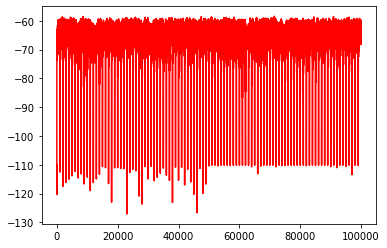

In [20]:
plt.plot(lnprob_flat, color = 'red')

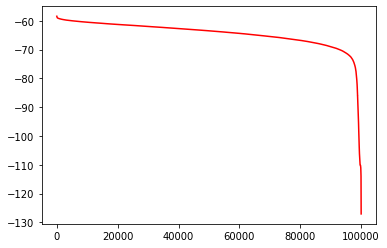

In [21]:
plt.plot(lnprob_flat[isort], color = 'red')

(-100, -58)

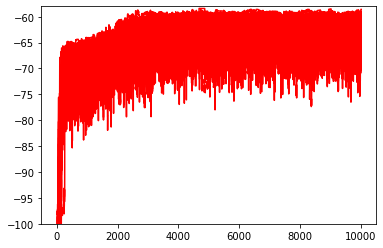

In [22]:
for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-100, -58)

# Free- New p0

In [28]:
f = open('Results_Rad-RX/burn1-2-3_23freep0.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

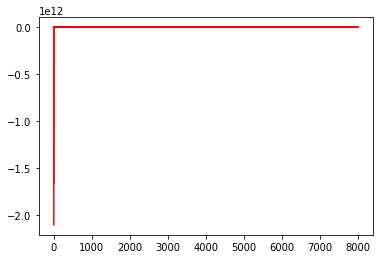

In [33]:
for i in range(100):
    plt.plot(lnprob[i], color = 'red')

(-10000.0, 1000.0)

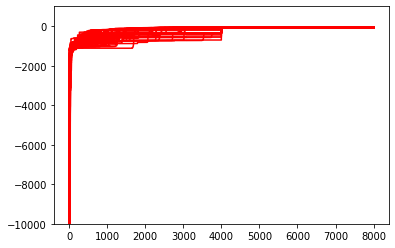

In [34]:
for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-1e4, 1e3)

In [35]:
f = open('Results_Rad-RX/mcmc_23freep0.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

-57.331662768648066
[-57.33166277]


(-100, -55)

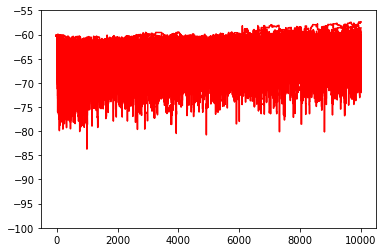

In [38]:
for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-100, -55)

# Example galaxy 2

## Grid

-85.84594499425292
[-85.84594499]


(-135, -65)

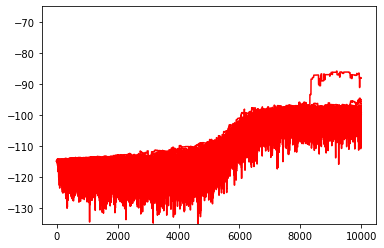

In [85]:
f = open('Results_Rad-RX/mcmc_2grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-135, -65)

## Free

-79.16235164238887
[-79.3323553]


(-135, -65)

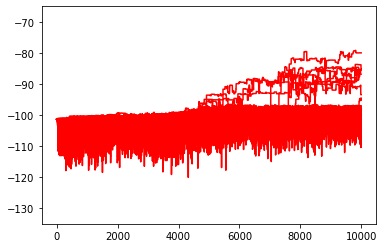

In [84]:
f = open('Results_Rad-RX/mcmc_2free.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-135, -65)

## Free p0 new

-73.980942192745
[-73.98094219]


(-135, -65)

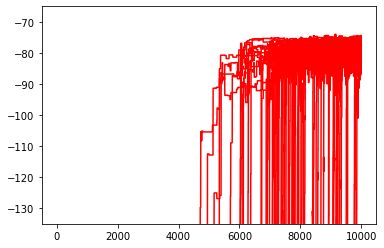

In [83]:
f = open('Results_Rad-RX/mcmc_2freep0.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-135, -65)

# Primer caso C1 grid vs free

-60.145308273209594
[-60.14530827]


(-100, -55)

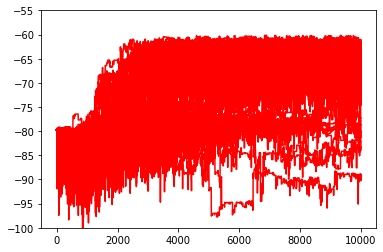

In [80]:
f = open('Results_Rad-RX/mcmc_23c1grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-100, -55)

-70.72254669741656
[-70.7225467]


(-100, -55)

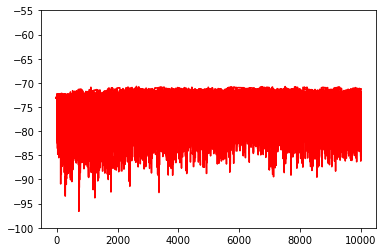

In [81]:
f = open('Results_Rad-RX/mcmc_23c1free.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-100, -55)

# Ebv-gal grid

-53.57059256228718
[-53.57059256]


(-100, -50)

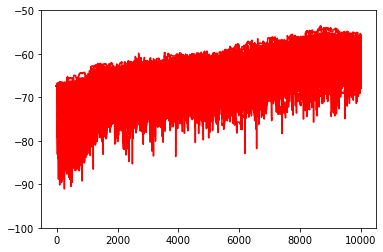

In [4]:
f = open('Results_Rad-RX/mcmc_23Ebvgal_grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
plt.ylim(-100, -50)

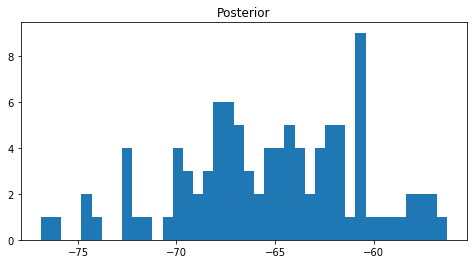

In [9]:
posterior = pd.read_csv('Results_Rad-RX/posteriors_23.0_Ebvgal_grid.txt', sep = ' ')
fig, ax1 = plt.subplots(1,1, figsize=(8,4))
ax1.set_title('Posterior')
ax1.hist(posterior['-ln_like'], bins= 40)
plt.show()

# Free parameters

-58.418052913077446
[-58.46623487]


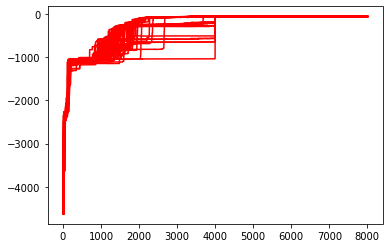

In [3]:
f = open('Results_Rad-RX/samples_burn1-2-3.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')

-56.63092994330603
[-56.63092994]


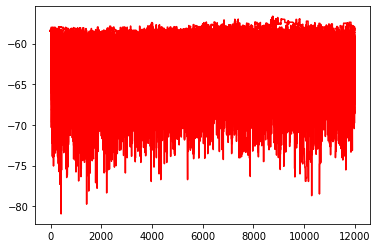

In [4]:
f = open('Results_Rad-RX/samples_mcmc.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']
lnprob_flat = samples['lnprob'][:,0:Ns*Nt:Nt].ravel() #from 0 to 100 and 0:1000*10 each 10
isort = (- lnprob_flat).argsort() #sort parameter vector for likelihood
lnprob_sorted = np.reshape(lnprob_flat[isort],(-1,1))
lnprob_max = lnprob_sorted[0]
print(lnprob.max())
print(lnprob_max)

for i in range(100):
    plt.plot(lnprob[i], color = 'red')
#plt.ylim(-100, -50)

# Tesis parámetros grid-c12-galaxia 2

## Fases burn-in

In [115]:
f = open('Results_Rad-RX/burn-in_tesis_c12_2_grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

In [122]:
plt.figure?

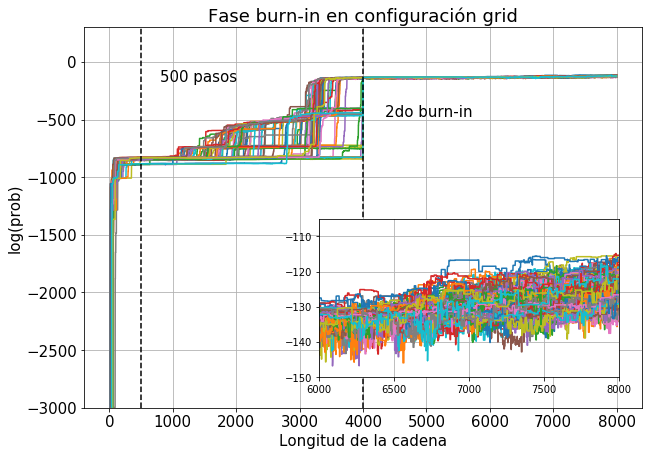

In [154]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    
plt.title(r'Fase burn-in en configuración grid', fontsize = 18)
plt.vlines(500, ymin=-3000, ymax=300, linestyle = '--', zorder = 9)
plt.annotate('500 pasos', xy=(1200, -260), 
             xycoords='data',xytext=(-25, +10), textcoords='offset points', fontsize=15,  rotation = 0)

plt.vlines(4000, ymin=-3000, ymax=300, linestyle = '--', zorder = 9)
plt.annotate('2do burn-in', xy=(4500, -560), 
             xycoords='data',xytext=(-10, +10), textcoords='offset points', fontsize=15,  rotation = 0)

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(-3000, 300)
plt.grid(True)
plt.ylabel(r'log(prob)', fontsize = 15) 
plt.xlabel(r'Longitud de la cadena', fontsize = 15) 
inset_ax = inset_axes(ax, width="50%", height=2.2, loc=1,  bbox_to_anchor=(30, 275,600, -18))

for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    plt.xlim(6000, 8000)
    plt.ylim(-150, -105)
plt.grid(True)
plt.xticks([6000, 6500, 7000, 7500, 8000])
plt.show()
#fig.savefig('Burn-in_C12_grid_2.png', dpi=700)

In [156]:
f = open('Results_Rad-RX/burn-in_tesis_c12_2_free.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

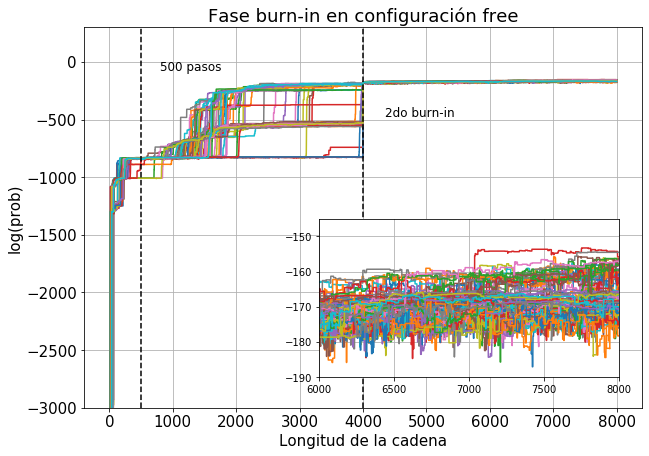

In [158]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    
plt.title(r'Fase burn-in en configuración free', fontsize = 18)
plt.vlines(500, ymin=-3000, ymax=300, linestyle = '--', zorder = 9)
plt.annotate('500 pasos', xy=(1200, -160), 
             xycoords='data',xytext=(-25, +10), textcoords='offset points', fontsize=12,  rotation = 0)

plt.vlines(4000, ymin=-3000, ymax=300, linestyle = '--', zorder = 9)
plt.annotate('2do burn-in', xy=(4500, -560), 
             xycoords='data',xytext=(-10, +10), textcoords='offset points', fontsize=12,  rotation = 0)

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylim(-3000, 300)
plt.grid(True)
plt.ylabel(r'log(prob)', fontsize = 15) 
plt.xlabel(r'Longitud de la cadena', fontsize = 15) 
inset_ax = inset_axes(ax, width="50%", height=2.2, loc=1,  bbox_to_anchor=(30, 275,600, -18))

for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    plt.xlim(6000, 8000)
    plt.ylim(-190, -145)
plt.grid(True)
plt.xticks([6000, 6500, 7000, 7500, 8000])
#plt.savefig('Burn-in_C12_free_2.png', dpi=700)
plt.show()

## Fases mcmc

In [159]:
f = open('Results_Rad-RX/mcmc_tesis_c12_2_grid.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

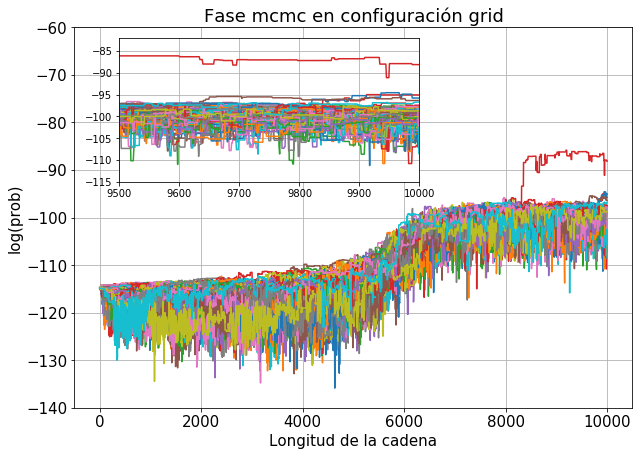

In [175]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    
plt.title(r'Fase mcmc en configuración grid', fontsize = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid(True)
plt.ylabel(r'log(prob)', fontsize = 15) 
plt.xlabel(r'Longitud de la cadena', fontsize = 15) 
plt.ylim(-140, -60)
inset_ax = inset_axes(ax, width="50%", height=2, loc=2,  bbox_to_anchor=(130, 428,600, 10))

for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    plt.xlim(9500, 10000)
    plt.ylim(-115, -82)
plt.grid(True)
plt.show()

In [176]:
f = open('Results_Rad-RX/mcmc_tesis_c12_2_free.sav', 'rb')
samples = pickle.load(f, encoding='latin1')
f.close()
nwalkers, nsamples, npar = samples['chain'].shape
lnprob = samples['lnprob']
pos = samples['final_pos']

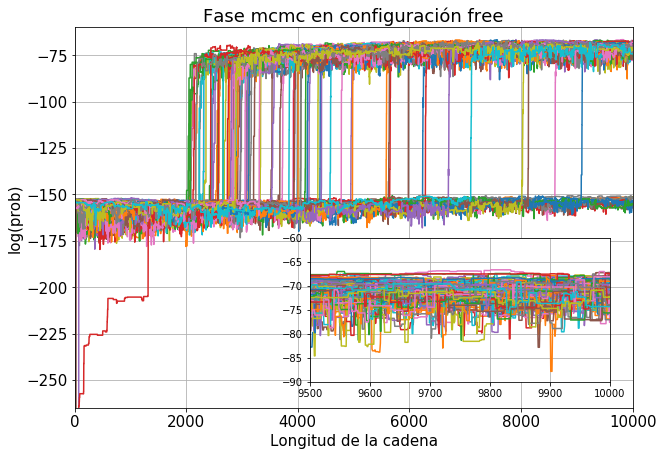

In [184]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    
plt.title(r'Fase mcmc en configuración free', fontsize = 18)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid(True)
plt.ylabel(r'log(prob)', fontsize = 15) 
plt.xlabel(r'Longitud de la cadena', fontsize = 15) 
plt.xlim(0, 10000)
plt.ylim(-265, -60)
inset_ax = inset_axes(ax, width="50%", height=2, loc=1,  bbox_to_anchor=(30, 283,600, -45))

for i in range(100):
    plt.plot(lnprob[i], linestyle = '-')
    plt.xlim(9500, 10000)
    plt.ylim(-90, -60)
plt.grid(True)
plt.show()

# Posteriores para cada combinación

In [3]:
c1 = np.array([79, 107.8, 39.9, 67.2, 57.1, 71.3, 32.5, 46.9, 59.7])
c2 = np.array([83, 105.4, 36.1, 54.9, 58.3, 62.0, 28.9, 44.9, 52.6])
c3 = np.array([63, 81, 40.9, 82.7, 58.7, 73, 88.6, 70.4, 68.4])
c4 = np.array([65.9, 76.0, 38.5, 88.9, 59.5, 64.6, 91.8, 101.0, 63.4])
c5 = np.array([80.8, 116.6, 40.9, 68.2, 57.1, 70.9, 29.3, 49.4, 47.7])
c6 = np.array([94.4, 111.8, 40.9, 51.8, 58.3, 60.6, 27.4, 54.1, 42.4])
c7 = np.array([62.2, 78.3, 42.6, 72.0, 58.9, 74.0, 125.5, 68.2, 62.8])
c8 = np.array([86.7, 75.5, 41.8, 57.3, 59.7, 64.6, 92.2, 66.0, 63.7])
values_cs = [c1,c2,c3,c4,c5,c6,c7,c8]

In [182]:
plt.errorbar?

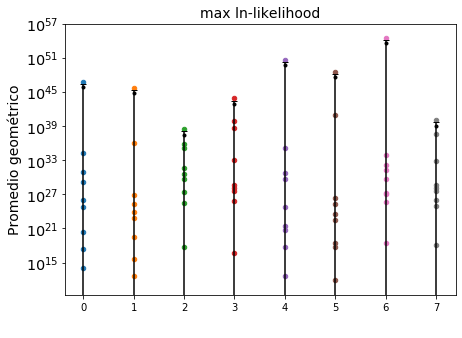

In [192]:
fig=plt.figure(figsize=(7,5))
#ax = fig.add_subplot(111)
plt.title(r'max ln-likelihood', fontsize = 14)
plt.ylabel('Promedio geométrico', linespacing=1, fontsize = 14)

# Redshift of all the sample of galaxies (41)
combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
color = ['red', 'blue', 'yellow', 'green', 'purple', 'cyan', 'orange', 'm']
for i in range(8):
    plt.yscale('log')
    plt.scatter(np.ones(9)*i, np.power(np.e, values_cs[i]), s = 20)
    plt.errorbar(i, np.power(np.e, values_cs[i]).mean(), np.power(np.e, values_cs[i]).std(), linestyle = '-', marker = '.', color = 'black', capsize = 3)
    plt.annotate(str(round(values_cs[i].mean(), 2)), xy=(i, values_cs[i].mean()), 
             xycoords='data',xytext=(-10, +10), textcoords='offset points', fontsize=12,  rotation = 0)
    
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(size = 'x-large')
#plt.ylim(55, 75)
plt.show()

1.7367262172658518e-26
9.094970788724205e-25
7.795712229832444e-30
8.193859049253246e-31
2.0940315504579887e-26
1.8257990842892446e-25
1.7015363335998757e-30
7.02424198688567e-29


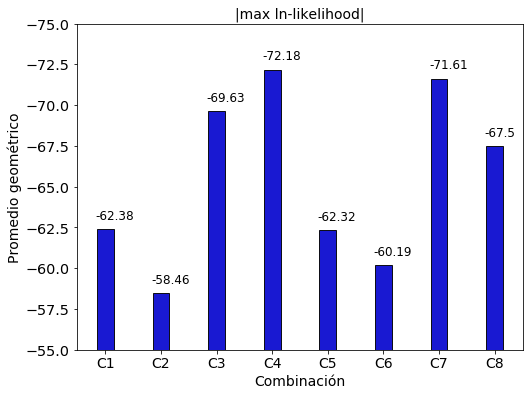

In [4]:
fig=plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111)
plt.title(r'|max ln-likelihood|', fontsize = 14)
plt.ylabel('Promedio geométrico', linespacing=1, fontsize = 14)
plt.xlabel('Combinación', linespacing=1, fontsize = 14)

# Redshift of all the sample of galaxies (41)
combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
color = ['red', 'blue', 'yellow', 'green', 'purple', 'cyan', 'orange', 'm']
for i in range(8):
    print(values_cs[i].std()/np.power(np.e, values_cs[i].mean()))
    #plt.errorbar(i, values_cs[i].mean(), values_cs[i].std()/np.power(np.e, values_cs[i].mean()), linestyle = '-', marker = '.')
    plt.bar(combination[i], -values_cs[i].mean(),color='mediumblue',alpha=0.9, \
            edgecolor = 'black', width=0.3)
    plt.annotate(str(round(-values_cs[i].mean(), 2)), xy=(i, -values_cs[i].mean()), 
             xycoords='data',xytext=(-10, +10), textcoords='offset points', fontsize=12,  rotation = 0)
    
plt.xticks(fontsize=14, rotation = 0)
plt.gca().invert_yaxis()
plt.yticks(size = 'x-large')
plt.ylim(-55, -75)
plt.show()

62.37777777777777
58.45555555555555
69.63333333333333
72.17777777777776
62.322222222222216
60.18888888888888
71.6111111111111
67.49999999999999


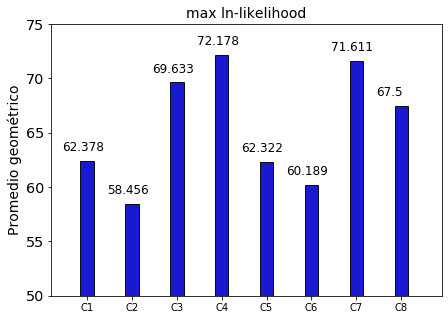

In [174]:
fig=plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111)
plt.title(r'max ln-likelihood', fontsize = 14)
plt.ylabel('Promedio geométrico', linespacing=1, fontsize = 14)

# Redshift of all the sample of galaxies (41)
combination = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
color = ['red', 'blue', 'yellow', 'green', 'purple', 'cyan', 'orange', 'm']
for i in range(8):
    #plt.yscale('log')
    print(np.log((np.power(np.e,values_cs[i]).prod())**(1/9)))
    plt.bar(combination[i], np.log((np.power(np.e,values_cs[i]).prod())**(1/9)),color='mediumblue',alpha=0.9, \
            edgecolor = 'black', width=0.3)
    plt.annotate(round(np.log((np.power(np.e,values_cs[i]).prod())**(1/9)),3), xy=(i, np.log((np.power(np.e,values_cs[i]).prod())**(1/9))), 
             xycoords='data',xytext=(-25, +10), textcoords='offset points', fontsize=12,  rotation = 0)
    
plt.xticks([0,1,2,3,4,5,6,7],['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], fontsize=10, rotation = 0)
plt.yticks(size = 'x-large')
#plt.ylim(3e15, 7e16)
plt.ylim(50, 75)
plt.xlim(-0.8, 7.9)
plt.show()

In [2]:
metal = np.array([[1.70, 1.72, 1.54, 1.75, 1.65, 1.73, 1.74, 1.71, 1.76],
        [1.70, 1.76, 1.67, 1.76, 1.71, 1.74, 1.71, 1.75, 1.70],
        [1.64, 1.82, 1.06, 1.82, 1.87, 1.73, 1.35, 1.00, 1.39],
        [1.45, 1.63, 1.63, 1.78, 1.63, 1.75, 1.61, 1.75, 1.55],
        [0.80, 1.68, 1.39, 1.62, 1.62, 1.66, 1.62, 1.65, 1.60],
        [1.39, 1.36, 1.68, 1.69, 1.66, 1.75, 1.76, 1.68, 1.65],
        [1.70, 1.67, 1.09, 1.74, 1.25, 1.77, 1.57, 1.64, 1.52],
        [1.35, 1.65, 1.60, 1.83, 1.66, 1.65, 1.31, 1.70, 1.12]])

tau = np.array([[2.46, 5.38, 4.74, 1.97, 5.13, 5.94, 3.13, 6.14, 6.20],
      [6.36, 3.81, 5.55, 2.49, 4.33, 4.44, 4.75, 5.21, 5.46],
      [2.89, 2.45, 2.12, 2.14, 5.28, 8.08, 9.47, 2.75, 9.14],
      [6.29, 3.86, 4.06, 0.96, 2.81, 4.32, 3.78, 5.92, 6.88],
      [4.27, 2.36, 3.96, 5.16, 4.52, 4.40, 3.45, 7.78, 1.78],
      [6.79, 3.78, 3.27, 4.00, 3.74, 4.81, 7.01, 3.18, 4.43],
      [7.31, 2.33, 3.82, 1.96, 8.15, 3.23, 7.92, 7.56, 5.57],
      [1.28, 5.26, 1.21, 6.93, 3.81, 4.60, 9.34, 6.53, 3.95]])

age = np.array([[7.08, 7.31, 9.14, 9.98, 7.70, 7.36, 7.61, 8.36, 7.52],
      [7.34, 7.34, 9.07, 9.92, 7.57, 8.86, 7.64, 7.77, 7.48],
      [7.82, 7.48, 9.56, 7.67, 7.85, 7.66, 7.20, 7.68, 8.81],
      [9.19, 7.83, 9.32, 9.57, 7.49, 8.57, 8.25, 7.05, 7.90],
      [8.40, 9.65, 9.09, 7.48, 8.09, 7.88, 9.26, 8.44, 7.89],
      [8.25, 7.55, 9.29, 9.79, 7.96, 7.21, 7.43, 9.40, 7.55],
      [9.85, 9.63, 8.83, 7.17, 7.71, 7.87, 7.20, 7.09, 8.70],
      [7.88, 7.52, 9.36, 7.27, 7.37, 9.56, 7.52, 7.05, 9.09]])

EBVgal = np.array([[0.06, 0.09, 0.52, 0.58, 0.46, 0.57, 0.56, 0.54, 0.56],
         [0.07, 0.10, 0.55, 0.58, 0.54, 0.57, 0.56, 0.55, 0.56],
         [0.58, 0.58, 0.47, 0.58, 0.19, 0.58, 0.32, 0.52, 0.53],
         [0.40, 0.52, 0.54, 0.57, 0.49, 0.56, 0.20, 0.43, 0.47],
         [0.13, 0.56, 0.49, 0.57, 0.46, 0.56, 0.52, 0.54, 0.45],
         [0.32, 0.28, 0.54, 0.58, 0.55, 0.57, 0.59, 0.55, 0.56],
         [0.57, 0.56, 0.53, 0.56, 0.42, 0.57, 0.38, 0.58, 0.48],
         [0.44, 0.54, 0.47, 0.56, 0.48, 0.55, 0.30, 0.43, 0.53]])

EBVbbb = np.array([[0, 0, 0.01, 0, 0.01, 0.03, 0, 0.02, 0.01],
         [0, 0, 0.01, 0, 0.01, 0.02, 0, 0.02, 0.01],
         [0.04, 0, 0.06, 0.06, 0.05, 0.06, 0, 0.06, 0.13],
         [0, 0.01, 0.06, 0.12, 0.05, 0.06, 0, 0.03, 0.08],
         [0, 0, 0.01, 0.01, 0.01, 0.03, 0.01, 0.03, 0.02],
         [0, 0, 0.01, 0, 0.01, 0.03, 0, 0.02, 0.01],
         [0.04, 0, 0.02, 0, 0.05, 0.06, 0.02, 0.06, 0.07],
         [0, 0, 0.06, 0, 0.05, 0.06, 0, 0.03, 0.13]])

alphaScat = np.array([[0.05, 0.05, 0.02, -0.03, 0.03, -0.07, -0.02, -0.04, 0.02],
         [0.07, 0.05, 0.04, 0.04, 0.02, 0.01, -0.06, -0.02, 0.06],
         [0.10, -0.11, -0.09, -0.20, 0.04, -0.06, -0.23, -0.01, -0.02],
         [0.02, 0.01, -0.03, -0.02, -0.05, -0.03, -0.06, -0.03, 0.03],
         [-0.10, 0.07, -0.02, 0.05, -0.01, 0.05, 0, 0.11, -0.05],
         [-0.02, 0.02, 0.01, -0.03, -0.05, 0, -0.06, 0.03, 0],
         [0.10, -0.06, -0.06, -0.07, -0.02, 0.05, 0.16, 0, -0.09],
         [0.16, -0.01, -0.09, 0.10, -0.02, 0.06, 0.13, 0, 0]])

Mass = np.array([[7.3601, 11.9618, 1.3168, 9.3544, 3.8383, 10.1892, 7.2526, 7.0694, 9.1260],
                 [7.3794, 11.9461, 5.3835, 9.3972, 0.3198, 10.0978, 7.2471, 7.0769, 9.1272],
                 [9.1857, 10.6898, 10.3425, 9.7741, 10.7439, 9.4153, 9.4828, 9.4640, 10.9095],
                 [8.2664, 10.6416,  10.3644, 10.9972, 11.1852, 9.9680, 9.9131, 9.1865, 10.4149],
                 [9.3597, 10.3929, 3.2271, 9.4219, 5.0696, 5.0945, 8.9162, 5.5657, 4.1567],
                 [9.2904, 8.5743, 1.3926, 9.4104, 3.2767, 9.1714, 8.8546, 9.0715, 9.8820],
                 [10.4631, 11.9043, 9.7443, 9.6041, 11.0979, 9.5387, 9.5114, 9.2975, 10.6886],
                 [7.3942,  10.7639, 10.3911, 9.6609, 11.1466, 10.4361, 9.6269, 9.1772, 11.1368]])

SFR_opt = np.array([[1.8847, 49472.8947, 0, 0.0145, 0.0001, 773.6031, 0.6444, 0.1229, 52.5427],
                    [1.2541, 42655.2806, 0.0004, 0.0590, 0, 25.9848, 0.4692, 0.2889, 47.6508],
                    [33.6199, 1894.3911, 4.3761, 158.0339, 1420.3676, 64.6266, 230.5482, 73.7463, 191.9411],
                    [0.1174, 299.9502, 10.8313, 3.9688, 4822.1257, 29.4090, 58.6070, 159.6168, 661.6854],
                    [10.6272, 0.0201, 0, 101.8961, 0.0016, 0, 0.2606, 0.0026, 0.0001],
                    [10.6532, 2.7102, 0, 0.2532, 0, 82.9202, 28.3679, 0.3153, 274.6658],
                    [3.2462, 143.3336, 23.7856, 298.3189, 2407.5138, 57.8795, 243.8479, 160.8961, 150.9488],
                    [0.6104, 1974.6185, 5.4140, 289.9358, 4708.1621, 9.5358, 164.1399, 156.9190, 138.0244]])


SFR_IR = np.array([[9.4051, 70.8010, 0, 4.7687, 0.0001, 773.6031, 11.9723, 14.6363, 80.1398],
                    [9.8463, 74.1914, 0.0004, 4.2899, 0, 25.9848, 12.2881, 14.8249, 80.5233],
                    [9.3187, 57.6468, 4.3761, 4.2349, 1420.3676, 64.6266, 10.3649, 19.9429, 74.8001],
                    [8.6120, 59.9536, 10.8313, 4.8033, 4822.1257, 29.4090, 10.6260, 8.3259, 73.1464],
                    [5.5304, 56.2367, 0, 3.6216, 0.0016, 0, 8.4577, 0.0000, 53.0076],
                    [6.4619, 46.1039, 0, 3.8367, 0, 82.9202, 16.0447, 11.7335, 101.1682],
                    [5.8718, 50.0735, 23.7856, 3.7311, 2407.5138, 57.8795, 0.0000, 12.6836, 0.0000],
                    [7.0948, 52.1267, 5.4140, 4.1892, 4708.1621, 9.5358, 10.4249, 14.5323, 64.2528]])

for i in range(8):
    metal[i] = np.array(metal[i]) 
    tau[i] = np.array(tau[i])
    age[i] = np.array(age[i]) 
    EBVgal[i] = np.array(EBVgal[i]) 
    EBVbbb[i] = np.array(EBVbbb[i]) 
    alphaScat[i] = np.array(alphaScat[i]) 
    Mass[i] = np.array(Mass[i])
    SFR_opt[i] = np.array(SFR_opt[i])
    SFR_IR[i] = np.array(SFR_IR[i])

In [32]:
def group(variable, ylabel, std, legend):
    color = ['red', 'blue', 'orange', 'green', 'purple', 'cyan', 'brown', 'm']
    combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
    f, ax = plt.subplots(figsize=(6, 6))
    for i in range(8):
        print(combination[i], np.array(variable[i]).std())
        if np.array(variable[i]).std() < std:
            ax.scatter(np.ones(9)*i, variable[i], c= color[i], s= 50, 
                       label = r'$\sigma$= ' + str(round(np.array(variable[i]).std(),4)))
            print('---------------------GROUP FOUND-----------------------')
        else:
            ax.scatter(np.ones(9)*i, variable[i], c= color[i], s= 50, alpha= 0.3)
        
    plt.xticks([0,1,2,3,4,5,6,7],['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], fontsize=10, rotation = 0)     
    ax.set_xlabel('Combinación', fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    if legend == True:
        ax.legend(fontsize = 14, ncol = 2)

C1 0.06429100507328636
---------------------GROUP FOUND-----------------------
C2 0.029731307022799254
---------------------GROUP FOUND-----------------------
C3 0.31425396665047134
C4 0.09952975856248308
C5 0.2653346361404829
C6 0.13801055604643764
C7 0.21919042963698127
C8 0.21532633860901784


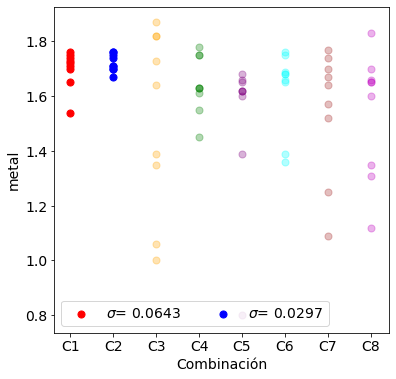

In [394]:
group(metal, 'metal', 0.07, True)

C1 0.04012326685615065
---------------------GROUP FOUND-----------------------
C2 0.03915780041490244
---------------------GROUP FOUND-----------------------
C3 0.10078702640398726
---------------------GROUP FOUND-----------------------
C4 0.029355210696939794
---------------------GROUP FOUND-----------------------
C5 0.06136311676215145
---------------------GROUP FOUND-----------------------
C6 0.029228769862146457
---------------------GROUP FOUND-----------------------
C7 0.08075263249158499
---------------------GROUP FOUND-----------------------
C8 0.07644896627453143
---------------------GROUP FOUND-----------------------


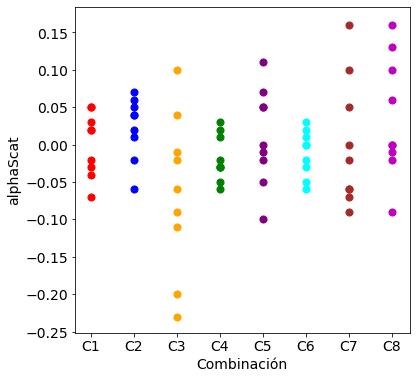

In [245]:
group(alphaScat, 'alphaScat', 0.6, False)

C1 0.9161392422067245
---------------------GROUP FOUND-----------------------
C2 0.880088379400362
---------------------GROUP FOUND-----------------------
C3 0.6971210639320677
---------------------GROUP FOUND-----------------------
C4 0.8229861316203975
---------------------GROUP FOUND-----------------------
C5 0.6843831141353359
---------------------GROUP FOUND-----------------------
C6 0.9183439200841672
---------------------GROUP FOUND-----------------------
C7 1.002738226366824
---------------------GROUP FOUND-----------------------
C8 0.9271275166333732
---------------------GROUP FOUND-----------------------


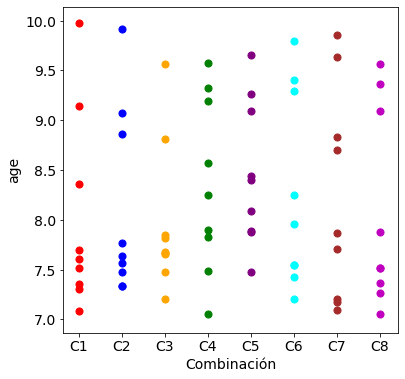

In [16]:
group(age, 'age', 10, False)

C1 0.009938079899999066
---------------------GROUP FOUND-----------------------
C2 0.007856742013183862
---------------------GROUP FOUND-----------------------
C3 0.036345393852880284
C4 0.03774508389214006
C5 0.010540925533894597
---------------------GROUP FOUND-----------------------
C6 0.009938079899999066
---------------------GROUP FOUND-----------------------
C7 0.02499382639822665
C8 0.04136557881996952


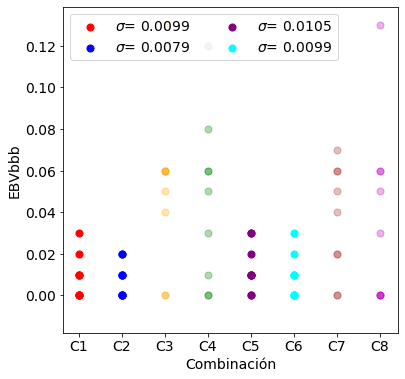

In [19]:
group(EBVbbb, 'EBVbbb', 0.011, True)

C1 3.0754986217032787
C2 3.3107043233341167
C3 0.6310909920502061
---------------------GROUP FOUND-----------------------
C4 0.8624125747783377
---------------------GROUP FOUND-----------------------
C5 2.538433784301641
C6 2.9000509004898687
C7 0.8371440206786548
---------------------GROUP FOUND-----------------------
C8 1.117894738082302
---------------------GROUP FOUND-----------------------


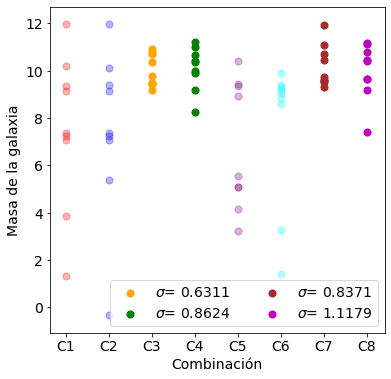

In [74]:
group(Mass, 'Masa de la galaxia', 1.2, True)

In [46]:
def group2(variable, ylabel, std, legend):
    color = ['red', 'blue', 'orange', 'green', 'purple', 'cyan', 'brown', 'm']
    combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
    f, ax = plt.subplots(figsize=(6, 6))
    ax.set_yscale('log')
    for i in range(8):
        print(combination[i], np.array(variable[i]).std())
        if np.array(variable[i]).std() < std:
            ax.scatter(np.ones(9)*i, variable[i], c= color[i], s= 50, 
                       label = r'$\sigma$= ' + str(round(np.array(variable[i]).std(),4)))
            print('---------------------GROUP FOUND-----------------------')
        else:
            ax.scatter(np.ones(9)*i, variable[i], c= color[i], s= 50, alpha= 0.3)
        
    plt.xticks([0,1,2,3,4,5,6,7],['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], fontsize=10, rotation = 0)     
    ax.set_xlabel('Combinación', fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=14)
    if legend == True:
        ax.legend(fontsize = 14, ncol = 2)
    plt.ylim(1e-2, 1e6)

No handles with labels found to put in legend.


C1 15517.11722744433
C2 13402.296596274207
C3 657.4240208590531
C4 1481.3138734582133
C5 31.766251903137395
C6 85.29372145120531
C7 719.9194572298798
C8 1492.8769314333827


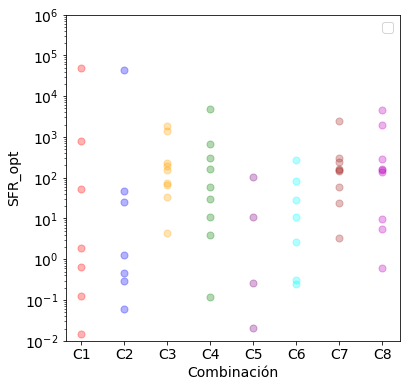

In [47]:
group2(SFR_opt, 'SFR_opt', 1, True)

In [48]:
def correlation(variable1, variable2, xlabel, ylabel, grupo):
    
    color = ['red', 'blue', 'yellow', 'green', 'purple', 'cyan', 'orange', 'm']
    combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
    f, ax = plt.subplots(figsize=(7, 7))
    for i in range(8):
        print(combination[i], np.corrcoef(variable1[i], variable2[i])[0,1])
    
        if np.corrcoef(variable1[i], variable2[i])[0,1] > 0.7 or np.corrcoef(variable1[i], variable2[i])[0,1] < -0.7:
            print('---------------------CORRELATION FOUND-----------------------')
            ax.scatter(variable1[i], variable2[i], c= color[i], s= 70, label = combination[i])
        elif -0.01 < np.corrcoef(variable1[i], variable2[i])[0,1] < 0.01 and grupo == 1:
            print('---------------------GROUP FOUND-----------------------')
            ax.scatter(variable1[i], variable2[i], c= color[i], s= 70, label = combination[i])
        else:
            ax.scatter(variable1[i], variable2[i], c= color[i], s= 70, alpha= 0.3, label = combination[i])
            
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel(ylabel, fontsize = 15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.legend(fontsize = 14, ncol = 1)

C1 -0.2682534928414912
C2 0.15499227988917136
C3 -0.4671196610449306
C4 -0.08144883073858612
C5 -0.019899605761272664
C6 0.12080615096766999
C7 -0.06415196349119895
C8 -0.31401138386086125


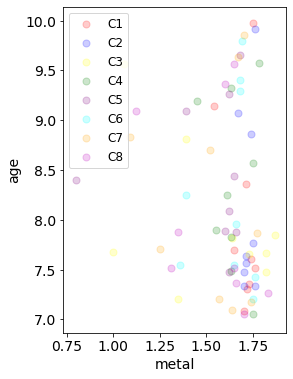

In [34]:
correlation(metal, age, 'metal', 'age', 0)

C1 -0.08091823807647129
C2 -0.7085631941720077
---------------------CORRELATION FOUND-----------------------
C3 0.007786714217352406
C4 -0.5533019789241829
C5 0.009968461400464052
C6 -0.10229803923931607
C7 -0.2289232608348609
C8 0.11875879110439354


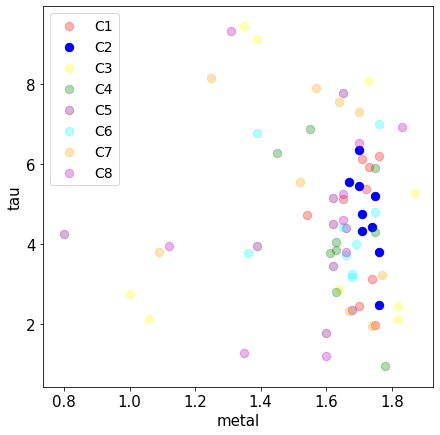

In [238]:
correlation(metal, tau, 'metal', 'tau', 0)

C1 0.027208535433445293
C2 -0.09596326771899441
C3 -0.010818817644025938
C4 0.4093569966838256
C5 0.9442208342854156
---------------------CORRELATION FOUND-----------------------
C6 0.9815565915017955
---------------------CORRELATION FOUND-----------------------
C7 0.44075515615109156
C8 0.37935459740023747


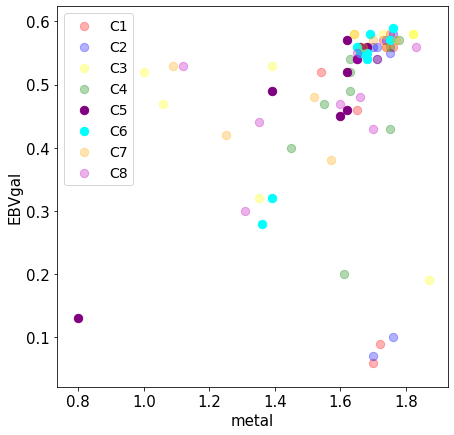

In [246]:
correlation(metal, EBVgal, 'metal', 'EBVgal', 1)

C1 0.7012758759654181
---------------------CORRELATION FOUND-----------------------
C2 0.22083616605983294
C3 0.21440897984546484
C4 -0.4172199349743341
C5 0.4510154317659887
C6 -0.3517534203813803
C7 0.507179737864569
C8 -0.3518261359187178


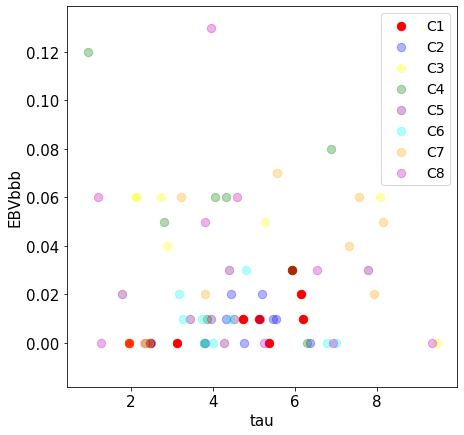

In [247]:
correlation(tau, EBVbbb, 'tau', 'EBVbbb', 1)

C1 -0.19134636298520052
C2 0.17122786358704417
C3 0.04978718700437048
C4 -0.25764201238307954
C5 -0.10773336812334236
C6 0.07884172270062231
C7 -0.3486464100667675
C8 -0.6880007796026605


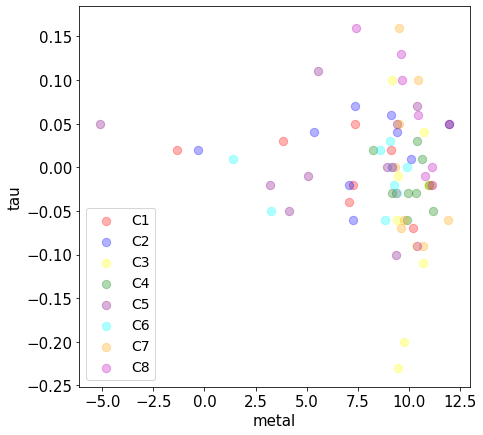

In [66]:
correlation(Mass, alphaScat, 'metal', 'tau', 1)

C1 -0.6377984084457652
C2 -0.22873312086296152
C3 0.34713483261610506
C4 0.03899755943400794
C5 0.4580786674510946
C6 0.4165124955623031
C7 0.07401349515276553
C8 -0.5235197085971219


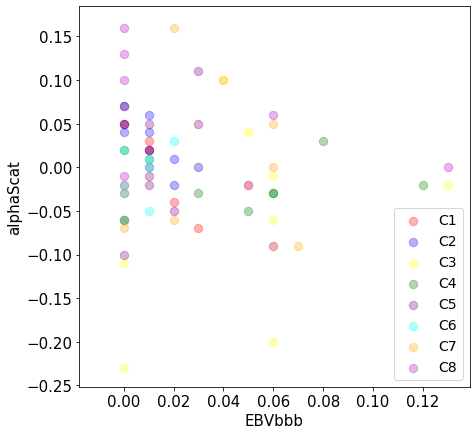

In [248]:
correlation(EBVbbb, alphaScat, 'EBVbbb', 'alphaScat', 1)

In [360]:
for i in range(8):
    data = np.array([np.array(metal[i]), np.array(tau[i]), np.array(age[i]), \
                    np.array(EBVgal[i]), np.array(EBVbbb[i])])
    print(np.corrcoef(data))
    print('------------------------------------------------------------------------')

[[ 1.         -0.08091824 -0.26825349  0.02720854 -0.06956083]
 [-0.08091824  1.         -0.33692814  0.19701656  0.70127588]
 [-0.26825349 -0.33692814  1.          0.49399735 -0.10902022]
 [ 0.02720854  0.19701656  0.49399735  1.          0.47000769]
 [-0.06956083  0.70127588 -0.10902022  0.47000769  1.        ]]
------------------------------------------------------------------------
[[ 1.         -0.70856319  0.15499228 -0.09596327  0.02114066]
 [-0.70856319  1.         -0.52753628 -0.23611422  0.22083617]
 [ 0.15499228 -0.52753628  1.          0.49894611  0.09802087]
 [-0.09596327 -0.23611422  0.49894611  1.          0.51365487]
 [ 0.02114066  0.22083617  0.09802087  0.51365487  1.        ]]
------------------------------------------------------------------------
[[ 1.          0.00778671 -0.46711966 -0.01081882 -0.22180033]
 [ 0.00778671  1.         -0.13198843 -0.3131267   0.21440898]
 [-0.46711966 -0.13198843  1.          0.05791432  0.60780342]
 [-0.01081882 -0.3131267   0.0579

In [265]:
ax5.set_xticklabels?

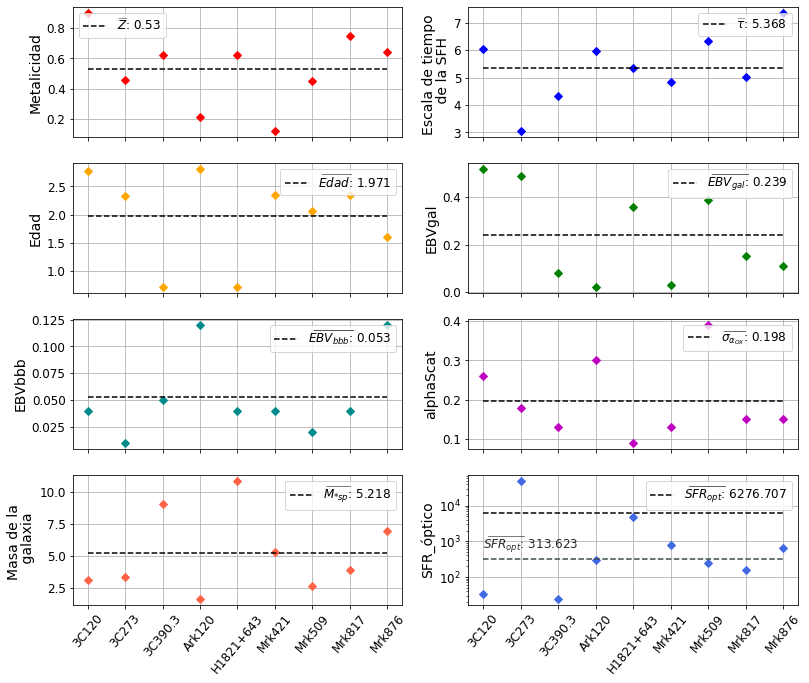

In [116]:
fig=plt.figure(figsize=(13,11))

# Redshift of all the sample of galaxies (41)
combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
color = ['red', 'blue', 'orange', 'green', 'darkcyan', 'm', 'tomato', 'royalblue']
Galaxy = ['3C120', '3C273', '3C390.3', 'Ark120', 'H1821+643', 'Mrk421', 'Mrk509', 'Mrk817', 'Mrk876']
yaxis = ['Metalicidad', 'Escala de tiempo \n de la SFH', 'Edad', 'EBVgal', 'EBVbbb', 'alphaScat', \
         'Masa de la \n galaxia', 'SFR_óptico' ]
labels = [r'$\widebar{Z}$: ', r'$\widebar{\tau}$: ', r'$\widebar{Edad}$: ', r'$\widebar{EBV_{gal}}$: ', \
          r'$\widebar{EBV_{bbb}}$: ', r'$\widebar{\sigma_{\alpha_{OX}}}$: ', r'$\widebar{M_{*sp}}$: ', \
         r'$\widebar{SFR_{opt}}$: ']
metal_mean, tau_mean, age_mean, EBVgal_mean, EBVbbb_mean, alphaScat_mean, Mass_mean, SFR_opt_mean = 0,0,0,0,0,0,0,0
data = [metal, tau, age, EBVgal, EBVbbb, alphaScat, Mass, SFR_opt]

for i in range(1,9):
    position = 420 + i
    ax = fig.add_subplot(position)
    ax.grid(True)
    ax.set_ylabel( yaxis[int(i-1)], linespacing=1, fontsize = 14)

    mean = 0
    parameter = data[int(i-1)]
    for j in range(9):
        ax.plot(j, parameter[:, j].max()-parameter[:, j].min(), marker = 'D', linestyle = '--', color= color[int(i-1)])
        mean += (parameter[:, j].max()-parameter[:, j].min())/9
        
    ax.hlines(mean, xmin=0, xmax=8, linestyle = '--', zorder = 9, label = labels[int(i-1)]+ str(round(mean,3)))
    if i == 8:
        ax.set_yscale('log')
        mean = 0
        for j in [0,2,3,5,6,7,8]:
            mean += (parameter[:, j].max()-parameter[:, j].min())/7
        ax.hlines(mean, xmin=0, xmax=8, linestyle = '--', zorder = 9, color = '#3b4a4a')
        ax.annotate(r'$\widebar{SFR_{opt}}$: '+ str(round(mean,3)), xy=(0, mean), color = '#262a2a',
             xycoords='data',xytext=(0, +10), textcoords='offset points', fontsize=12,  rotation = 0)
    
    if i == 7 or i == 8:
        ax.set_xticklabels(['3C120', '3C120', '3C273', '3C390.3', 'Ark120', 'H1821+643', 'Mrk421', 'Mrk509', 'Mrk817', 'Mrk876'], rotation =  50)
    else:
        ax.set_xticklabels([])

    ax.tick_params(labelsize = 12)
    ax.legend(fontsize = 12, ncol = 1)

plt.show()

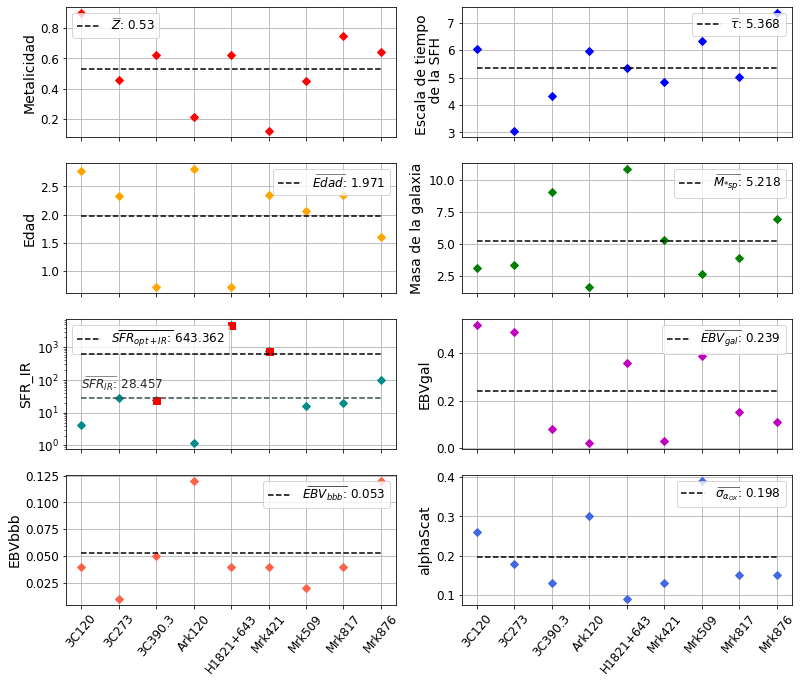

In [4]:
fig=plt.figure(figsize=(13,11))

# Redshift of all the sample of galaxies (41)
combination = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
color = ['red', 'blue', 'orange', 'green', 'darkcyan', 'm', 'tomato', 'royalblue']
Galaxy = ['3C120', '3C273', '3C390.3', 'Ark120', 'H1821+643', 'Mrk421', 'Mrk509', 'Mrk817', 'Mrk876']
yaxis = ['Metalicidad', 'Escala de tiempo \n de la SFH', 'Edad', 'Masa de la galaxia', 'SFR_IR', \
         'EBVgal', 'EBVbbb', 'alphaScat']
labels = [r'$\widebar{Z}$: ', r'$\widebar{\tau}$: ', r'$\widebar{Edad}$: ', r'$\widebar{M_{*sp}}$: ', \
         r'$\widebar{SFR_{opt+IR}}$: ', r'$\widebar{EBV_{gal}}$: ', \
          r'$\widebar{EBV_{bbb}}$: ', r'$\widebar{\sigma_{\alpha_{OX}}}$: ']
metal_mean, tau_mean, age_mean, Mass_mean, SFR_opt_mean, EBVgal_mean, EBVbbb_mean, alphaScat_mean = 0,0,0,0,0,0,0,0
data = [metal, tau, age, Mass, SFR_IR, EBVgal, EBVbbb, alphaScat]

for i in range(1,9):
    position = 420 + i
    ax = fig.add_subplot(position)
    ax.grid(True)
    ax.set_ylabel( yaxis[int(i-1)], linespacing=1, fontsize = 14)

    mean = 0
    parameter = data[int(i-1)]
    for j in range(9):
        ax.plot(j, parameter[:, j].max()-parameter[:, j].min(), marker = 'D', linestyle = '--', color= color[int(i-1)])
        mean += (parameter[:, j].max()-parameter[:, j].min())/9
        
    ax.hlines(mean, xmin=0, xmax=8, linestyle = '--', zorder = 9, label = labels[int(i-1)]+ str(round(mean,3)))
    if i == 5:
        ax.set_yscale('log')
        mean = 0
        for j in [0,1,3,6,7,8]:
            mean += (parameter[:, j].max()-parameter[:, j].min())/6
        ax.hlines(mean, xmin=0, xmax=8, linestyle = '--', zorder = 9, color = '#3b4a4a')
        ax.annotate(r'$\widebar{SFR_{IR}}$: '+ str(round(mean,3)), xy=(0, mean), color = '#262a2a',
             xycoords='data',xytext=(0, +9), textcoords='offset points', fontsize=12,  rotation = 0)
        for j in [2,4,5]:
            ax.plot(j, parameter[:, j].max()-parameter[:, j].min(), marker = 's', linestyle = '--', 
                    color= 'red', markersize = 7)
            
    
    if i == 7 or i == 8:
        ax.set_xticklabels(['3C120', '3C120', '3C273', '3C390.3', 'Ark120', 'H1821+643', 'Mrk421', 'Mrk509', 'Mrk817', 'Mrk876'], rotation =  50)
    else:
        ax.set_xticklabels([])

    ax.tick_params(labelsize = 12)
    ax.legend(fontsize = 12, ncol = 1)

plt.show()

In [ ]:
fontdict: {}